# Project 5 - Image segmentation with histogram thresholding

Image segmentation = decomposing the image in its composing parts.

Thus each pixel will get a label that says to which object (or class of objects) that pixel belongs to.

## 1. Histograms
The simplest definition of a histogram is that it is a function which shows how often each grayscale value appears in an image.

<img src="media/hist.png"><center>A grayscale image and its histogram</center>

In order to use histogram segmentation the objects and the background need to have different grayscale values. After the histogram is displayed, a set of thresholds need to be decided in order to separate the objects and background.
<img src="media/levels.png"><center>The correspondence between different objects of an image and the background.</center>

## 2. Histogram thresholding: binarization

If the histogram has 2 dominant modes, they can be separated (thus the objects can be identified) by choosing a gray level $T$, called a threshold. This threshold is chosen in the global minimum of the histogram. Given the initial gray level image $f$, we build a new labeled image $g$ using: </br>
$g(m,n)=\left\{{E_{0},0\leq f(m,n)<T \\ E_{1},T\leq f(m,n)<L}
\right.$

The labeled image will have 2 labels: $E_{0}$ for the pixels that have a gray level lower than the threshold  $T$ and $E_{1}$ for the pixels that have a gray level higher or equal to the threshold $T$. The labels $E_{0}$ and $E_{1}$ can have numerical values (0 and 1, or 0 and 255) or can be strings of characters. This is called binarization because the resulting image has only 2 values. We will use numerical labels. 

## 3. Evaluating the segmentation quality 
One way to measure the quality of the segmentation operation is to check the correctness of the segmentation decision at pixel level, for test images, in which pixels belonging to certain classes of objects are known (thus having example images for a segmentation ideal). Thus we can identify the number of correctly segmented pixels (TP, true positives), as well as the two types of errors: pixels of the foreground (object) which were declared as background (FN, false negatives) and pixels from background that were declared as object (FP, false positives). Obviously, this kind of measure refers to the segmentation of a single category of objects in the image (a single class - the foregraound), all the rest of the image being considered background; if segmentation characterization is desired for an image that contains several classes, the evaluation process is performed for each class and then consider the average values at the level of the whole image.

The basic measures (TP, FN, FP) are, obviously, absolute measures. In order to make them relative, some normalizations are required. The most used normalizes measures are precision and recall. They both have values in the range $[0; 1]$ and are ascending with the segmentation quality. Precision is the percent of the segmented pixels that are correctly segmented:</br>
$PREC = \frac{TP}{TP + FP}$</br>
Recall is the percent of the segmented pixels from the total number of pixels that need to be segmented:</br>
$REC = \frac{TP}{TP + FN}$</br>

### There is need of a correctly segmented image (mask) as refference!

## 4. Exercises

Exercise 1. You have 2 images: one is given by the segmentation method (Segm) and one is the ideal labeled image (Mask) as given in the code below. Write a script that computes the quality measures: TP, FP, FN, Precision and Recall. Print each value.

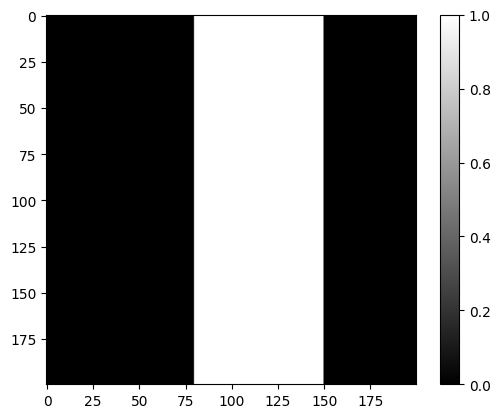

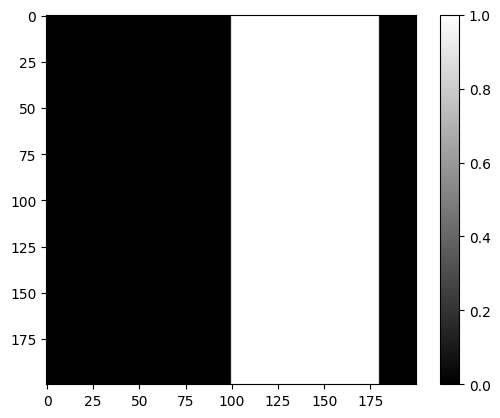

Precision: 0.625
Recall: 0.7142857142857143
False Positive: 6000
False Negative: 4000
True Positive: 10000
True Negative: 20000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Mask = np.zeros([200, 200])
Mask[:, 80:150] = 1
plt.figure()
plt.imshow(Mask, cmap = 'gray')
plt.colorbar()
plt.show()

Segm = np.zeros([200 ,200])
Segm[:, 100:180] = 1
plt.figure()
plt.imshow(Segm, cmap = 'gray')
plt.colorbar()
plt.show()

fp = len(Segm[np.logical_and(Mask == 0, Segm == 1)])
fn = len(Segm[np.logical_and(Mask == 1, Segm == 0)])
tp = len(Segm[np.logical_and(Mask == 1, Segm == 1)])
tn = len(Segm[np.logical_and(Mask == 0, Segm == 0)])

prec = tp / (tp + fp)
rec = tp / (tp + fn)

print('Precision:', prec)
print('Recall:', rec)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)
print('True Negative:', tn)

Exercise 2: Make a test image that contains a square with a gray level of 100 on a uniform background with a gray level of 180 (see exercise 1 for exemple). Add gaussian noise to it with a standard deviation of 10 and, separately, a standard deviation of 30. Compute the precision and recall when you vary the segmentation threshold for both cases of noise power. Print and comment the results.

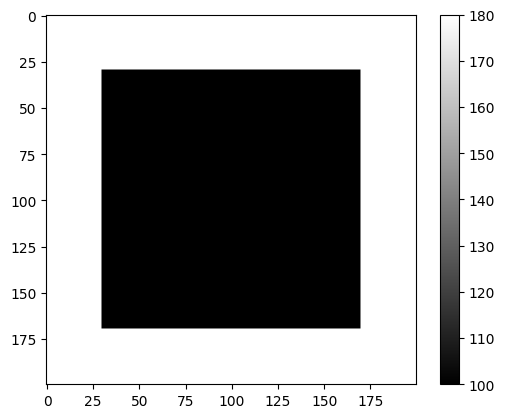

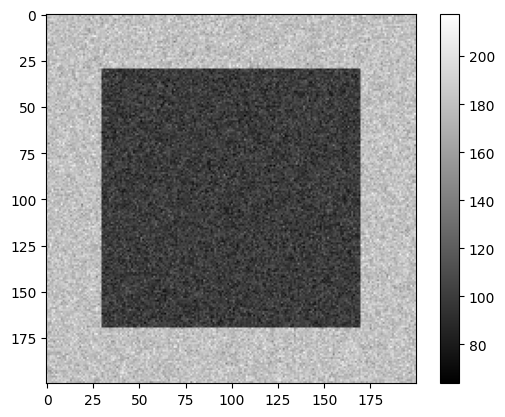

217.65567491344626
63.75391037807183


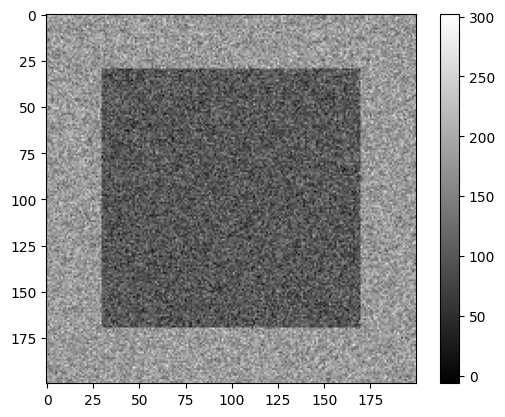

302.4867317328403
-6.477311327702793


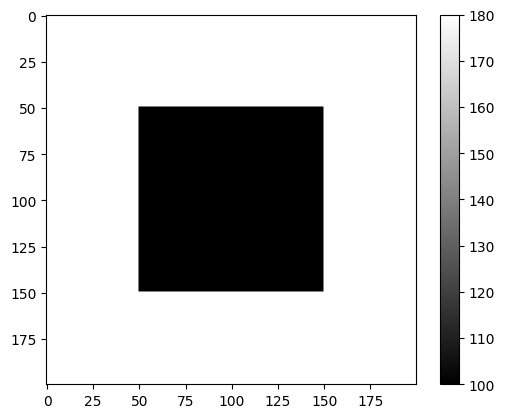

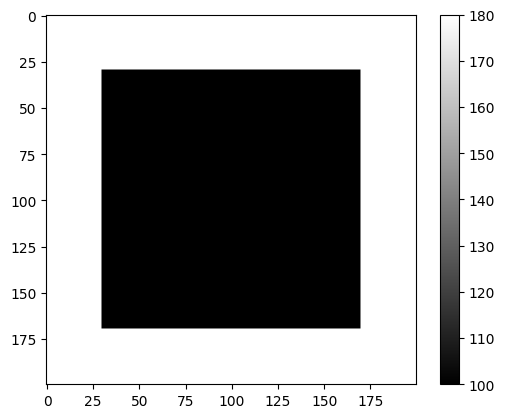

Precision (std dev 10): 0.7499937498437461
Recall (std dev 10): 0.49999166652777544
False Positive (std dev 10): 10000
False Negative (std dev 10): 30000
True Positive (std dev 10): 29999
True Negative (std dev 10): 9999


Precision (std dev 30): 0.7499937498437461
Recall (std dev 30): 0.49999166652777544
False Positive (std dev 30): 10000
False Negative (std dev 30): 30000
True Positive (std dev 30): 29999
True Negative (std dev 30): 9999


Precision (std img): 1.0
Recall (std img): 0.68
False Positive (std img): 0
False Negative (std img): 9600
True Positive (std img): 20400
True Negative (std img): 10000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img = np.ones([200, 200]) * 180
img[30:170, 30:170] = 100
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.colorbar()
plt.show()

n1 = np.random.normal(0, 10, Mask.shape) #std dev of 10
img1 = img + n1
plt.figure()
plt.imshow(img1, cmap = 'gray')
plt.colorbar()
plt.show()

print(np.max(img1)) #new max val for noise 1
print(np.min(img1)) #new min val for noise 1

n2 = np.random.normal(0, 30, Mask.shape) #std dev of 30
img2 = img + n2
plt.figure()
plt.imshow(img2, cmap = 'gray')
plt.colorbar()
plt.show()

print(np.max(img2)) #new max val for noise 2
print(np.min(img2)) #new min val for noise 2

mask = np.ones([200, 200]) * 180
mask[50:150, 50:150] = 100
plt.figure()
plt.imshow(Segm, cmap = 'gray')
plt.colorbar()
plt.show()

#for noise 1

tp1 = len(img1[np.logical_and(mask == 180, img1 < np.max(img1), img1 > 180 - 40)])
tn1 = len(img1[np.logical_and(mask == 100, img1 > np.min(img1), img1 < 100 + 40)])
fp1 = len(img1[np.logical_and(mask == 100, img1 < np.max(img1), img1 > 180 - 40)])
fn1 = len(img1[np.logical_and(mask == 180, img1 > np.min(img1), img1 > 100 + 40)])

prec1 = tp1 / (tp1 + fp1)
rec1 = tp1 / (tp1 + fn1)

print('Precision (std dev 10):', prec1)
print('Recall (std dev 10):', rec1)
print('False Positive (std dev 10):', fp1)
print('False Negative (std dev 10):', fn1)
print('True Positive (std dev 10):', tp1)
print('True Negative (std dev 10):', tn1)

print('\n')

#for nosie 2

tp2 = len(img2[np.logical_and(mask == 180, img2 < np.max(img2), img2 > 180 - 120)])
tn2 = len(img2[np.logical_and(mask == 100, img2 > np.min(img2), img2 < 100 + 10)])
fp2 = len(img2[np.logical_and(mask == 100, img2 < np.max(img2), img2 > 180 - 120)])
fn2 = len(img2[np.logical_and(mask == 180, img2 > np.min(img2), img2 > 110 + 10)])

prec2 = tp2 / (tp2 + fp2)
rec2 = tp2 / (tp2 + fn2)

print('Precision (std dev 30):', prec2)
print('Recall (std dev 30):', rec2)
print('False Positive (std dev 30):', fp2)
print('False Negative (std dev 30):', fn2)
print('True Positive (std dev 30):', tp2)
print('True Negative (std dev 30):', tn2)

print('\n')

#for normal img with mask

tp = len(img[np.logical_and(mask == 180, img == 180)])
tn = len(img[np.logical_and(mask == 100, img == 100)])
fp = len(img[np.logical_and(mask == 100, img == 180)])
fn = len(img[np.logical_and(mask == 180, img == 100)])

prec = tp / (tp + fp)
rec = tp / (tp + fn)

print('Precision (std img):', prec)
print('Recall (std img):', rec)
print('False Positive (std img):', fp)
print('False Negative (std img):', fn)
print('True Positive (std img):', tp)
print('True Negative (std img):', tn)